# Linear Regression
#### Implement a simple linear regression on dog age x veterinary visit count data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv("https://bit.ly/3goOAnt", delimiter=",")
df.head()


,x,y
0,1,5
1,2,10
2,3,10
3,4,15
4,5,14


m = [1.93939394]
b = [4.73333333]


Text(0, 0.5, 'Visit Count')

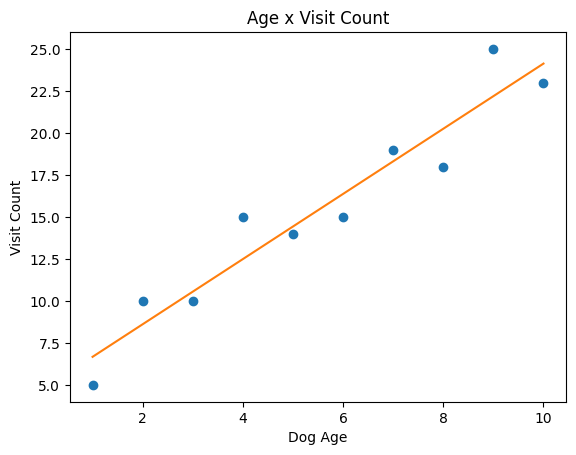

In [117]:
# Extract input variables (all rows, all columns but last column
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)
# m, b
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f"m = {m}")
print(f"b = {b}")

plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.title("Age x Visit Count")
plt.xlabel("Dog Age")
plt.ylabel("Visit Count")

#### Residuals and squared Errors
he residual is the numeric difference between the line and the points. Points obove the line will have positive residual, while points below the line, negative. In other words it is the subtracted difference between the predicted y-values(derived from the line) and the actual y-values(that comes with the data). Another name for residuals are errors, because they reflect how wrong our line is predicting the data.

If we are fitting a line though our data points, we likely want to minimize these residuals in total so there is the least gap possible between the line and the points. We take the **sum of squares**, which simply squares each residual and sum them.

In [118]:
points = pd.read_csv("https://bit.ly/3goOAnt", delimiter=",").itertuples()

# test with a given line
m = 1.93939394
b = 4.73333333

# calculate the residuals
for p in points:
    yactual = p.y
    ypredict = m*p.x+b
    residual = yactual - ypredict
    print(f"residual -> {residual}")

residual -> -1.6727272699999993
residual -> 1.3878787900000003
residual -> -0.5515151500000002
residual -> 2.509090910000001
residual -> -0.43030303000000103
residual -> -1.3696969699999997
residual -> 0.6909090900000017
residual -> -2.2484848500000005
residual -> 2.812121210000001
residual -> -1.1272727300000014


#### Calculating the sum of squares for a given line and data

In [119]:
points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# calculate the squares
for p in points:
    yactual = p.y
    ypredict = m*p.x + b
    residual_squared = (ypredict - yactual)**2
    sum_of_squares += residual_squared

print(f"sum of squares: {sum_of_squares}")

sum of squares: 28.096969704500005


#### Finding the best line fit
There are a couple of search algorithms we can employ, which try to find the right set of values to solve a given problem. You can try a brute force approach, generating random m and b values millions of times and choosingthe ones that produce the least sum of squares. This will not work well because it will take an endless amount of time to find even a decent approximation. We will need something a little more guided. I will curate
five techniques you can use: *closed form, matrix inversion, matrix decomposition, gradient descent, and stochastic gradient descent*. There are
other search algorithms like *hill climbing* that could be used.

* **Close Form Equation**

Only works with simple linear regression with one input. For a simple linear
regression with only one input and one output variable, here are the closed form
equations to calculate m and b:

$$
m = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - \big( \sum x)^2} \\[10pt]
b = \frac{\sum y}{n} -m \frac{\sum x}{n}
$$

In [120]:
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
n = len(points)

m = (n * sum(p.x * p.y for p in points) - sum(p.x for p in points) * sum(p.y for p in points)) / (n*sum(p.x**2 for p in points)
    - sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


* **Inverse Matrix Techniques**

We can use transposed and inverse matrices, which we covered in, to fit a linear regression. Next, we calculate a vector of coefficients b given a matrix of input variable values X and a vector of output variable values y. Without going down a rabbit hole of calculus and linear algebra proofs, here is the formula:

$$
b = \big(X^T*X \big)^{-1}*X^T*y
$$

Transpose and inverse operations are performed on the matrix $X$ and combined with matrix multiplication.

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


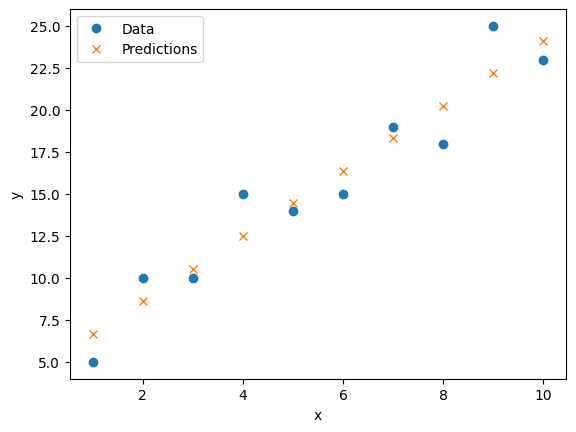

In [121]:
# extract input variables (all rows, all columns but last columnO
x = df.values[:, 0]
x1 = np.vstack([x, np.ones(len(x))]).T

y = df.values[:, 1]

# calculate coefficients for slope and intercept
b = inv(x1.transpose() @ x1) @ (x1.transpose() @ y)
print(b)

# predict against the y-values
predict = x1.dot(b)
print(predict)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="Data")
ax.plot(x, predict, 'x', label="Predictions")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

* **Matrix Decomposition**
When you have a lot of data with a lot of dimensions, computers can start to
choke and produce unstable results. This is a use case for matrix
decomposition. In this specific case, we take our matrix $X$, append an additional column of 1s
to generate the intercept $\beta_0$ just like before, and then decompose it into two
component matrices **Q and R**:
$$
X = Q*R
$$

In [122]:
from numpy.linalg import qr, inv

x = df.values[:, 0]
y = df.values[:, 1]

# add placeholder "1" column to generate intercept
x1 = np.vstack([x, np.ones(len(x))]).T

# calculate coefficients for slope and intercept
# using QR decomposition
Q, R = qr(x1)
b = inv(R).dot(Q.transpose()).dot(y)
print(b)

[1.93939394 4.73333333]


* **Gradient Descent**

Gradient descent is an optimization technique that uses derivatives and
iterations to minimize/maximize a set of parameters against an objective.
For the function $f (x) = (x − 3)^{2} + 4$, let’s find the x-value that produces
the lowest point of that function. While we could solve this algebraically,
let’s use gradient descent to do it.

In [129]:
def f(x):
    return (x - 3)**2 + 4

def dx_f(x):
    return 2*(x - 3)

# the learning rate
L = 0.001

# the number of iterations to perform gradient descent
iterations = 100_000

# start at a random x
x = np.random.randint(-15, 15)

for i in range(iterations):
    # get the slope
    dx = dx_f(x)
    print(dx)
    x -= L * dx

print(x, f(x))


-30
-29.94
-29.88012
-29.820359760000002
-29.76071904048
-29.70119760239904
-29.641795207194242
-29.582511616779854
-29.523346593546293
-29.4642999003592
-29.405371300558482
-29.346560557957364
-29.28786743684145
-29.229291701967767
-29.17083311856383
-29.112491452326704
-29.05426646942205
-28.996157936483204
-28.93816562061024
-28.880289289369017
-28.82252871079028
-28.7648836533687
-28.707353886061963
-28.649939178289838
-28.592639299933257
-28.53545402133339
-28.47838311329072
-28.42142634706414
-28.364583494370013
-28.30785432738127
-28.251238618726507
-28.194736141489056
-28.13834666920608
-28.082069975867668
-28.025905835915932
-27.9698540242441
-27.913914316195612
-27.85808648756322
-27.802370314588092
-27.746765573958918
-27.691272042811
-27.63588949872538
-27.58061771972793
-27.525456484288473
-27.470405571319894
-27.415464760177255
-27.3606338306569
-27.305912562995587
-27.251300737869595
-27.196798136393856
-27.142404540121067
-27.088119731040823
-27.033943491578743
-26.9798

Text(0, 0.5, 'y - f(x)')

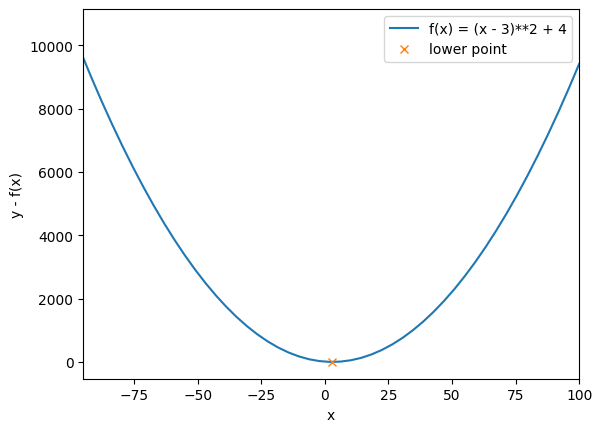

In [128]:
serie = np.linspace(-100, 100)
plt.plot(serie, f(serie), label="f(x) = (x - 3)**2 + 4")
plt.xlim(-95, 100)
plt.plot(x, f(x), "x", label="lower point")
plt.legend()
plt.xlabel("x")
plt.ylabel("y - f(x)")

* **Gradient Descent and Linear Regression**

We use partial derivatives to calculate the slopes for m and b.